In [8]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np 
import random

In [3]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [4]:
model = Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/home/student/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-07 11:47:44.891400: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
model.compile(optimizer='sgd', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
H = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs = 8)



2025-08-07 11:47:48.648257: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/8
1857/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7319 - loss: 1.0421

2025-08-07 11:47:57.589964: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8385 - loss: 0.6506 - val_accuracy: 0.9037 - val_loss: 0.3574
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9051 - loss: 0.3376 - val_accuracy: 0.9171 - val_loss: 0.2973
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9183 - loss: 0.2905 - val_accuracy: 0.9268 - val_loss: 0.2618
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9271 - loss: 0.2613 - val_accuracy: 0.9327 - val_loss: 0.2427
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9337 - loss: 0.2394 - val_accuracy: 0.9375 - val_loss: 0.2243
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9387 - loss: 0.2215 - val_accuracy: 0.9414 - val_loss: 0.2086
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9426 - loss: 0.2062 - val_accuracy: 0.9421 - val_loss: 0.1989
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9466 - loss: 0.1928 - val_accuracy: 

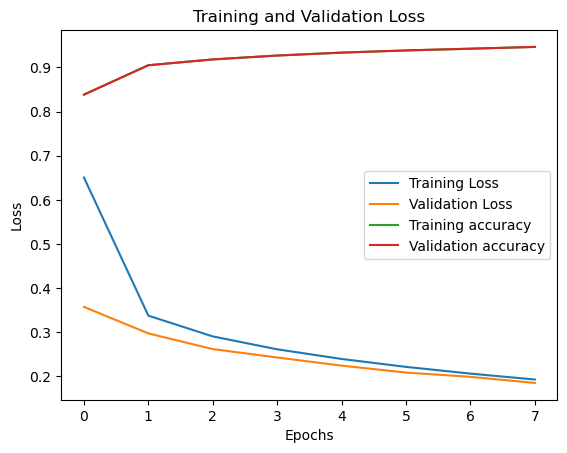

In [9]:
plt.plot(H.history['loss'], label='Training Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.plot(H.history['accuracy'], label='Training accuracy')
plt.plot(H.history['accuracy'], label='Validation accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("loss: %.3f" % test_loss)
print("accuracy: %.3f"% test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9470 - loss: 0.1851
loss: 0.185
accuracy: 0.947


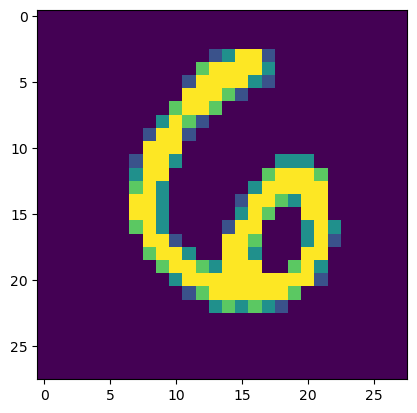

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Handwritten numbere in the image is: 6


In [11]:
import random
n= random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predict= model.predict(x_test)
print("Handwritten numbere in the image is: %d" %np.argmax(predict[n]))